In [3]:
# Add PyDatAnalysis to path
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, "/Users/owensheekey/Documents/Research/PyDatAnalysis")

export_path = 'Exports/'

In [29]:
from __future__ import annotations
from progressbar import progressbar
from src.DatObject.Make_Dat import get_dat, get_dats
import src.UsefulFunctions as U
from src.DataStandardize.ExpSpecific.Feb21 import Feb21Exp2HDF, Feb21ExpConfig
from src.DataStandardize.ExpConfig import ExpConfigGroupDatAttribute, ExpConfigBase
import multiprocessing as mp
import plotly.graph_objs as go
import numpy as np
import lmfit as lm
from typing import TYPE_CHECKING, Iterable, Optional
from src.DatObject.Attributes.Transition import i_sense_digamma, i_sense, i_sense_digamma_quad
from src.UsefulFunctions import edit_params
from src.DatObject.Attributes.SquareEntropy import square_wave_time_array, integrate_entropy
import logging
logger = logging.getLogger(__name__)
import src.UsefulFunctions as U
from src.CoreUtil import decimate
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [46]:
end = 4413+1
datnums = np.sort(list(set(range(4342, end)) - set(range(4343, end, 2))))
datnums_tune = np.sort(list(set(range(4342, end)) - set(range(4342, end, 2))))
dats = get_dats(list(datnums), overwrite=False)
dats_tune = get_dats(list(datnums_tune), overwrite=False)

In [72]:
titles = [f'IS={dat.Logs.bds["IS"]}, ESC={dat.Logs.fds["ESC"]}, dat{dat.datnum}' for dat in dats]
len(titles)

36

In [73]:
fig = make_subplots(
    rows=6, cols=7,
    subplot_titles=titles)
for i, dat in enumerate(dats):
    data = dat.Data.get_data('Experiment Copy/cscurrent_2d')
    x = dat.Data.get_data('Experiment Copy/x_array')
    y = dat.Data.get_data('Experiment Copy/y_array')
    print(f'{int(np.floor(i/7) + 1)},{int(i%7 + 1)}')
    fig.add_trace(go.Heatmap(
                    z=np.diff(data), x=x[:-1], y=y), row=int(np.floor(i/7) + 1), col=int(i%7 + 1))
    fig.add_trace(go.Scatter(mode='lines', 
                         x=[-500,500], y=[100,100], 
                         marker_color="White"), row=int(np.floor(i/7) + 1), col=int(i%7 + 1))
    fig.update_layout(xaxis_title='ACC*100 /mV', yaxis_title='IP1*200')

# fig.add_trace(go.Scatter(x=[20, 30, 40], y=[50, 60, 70]),
#               row=1, col=2)

# fig.add_trace(go.Scatter(x=[300, 400, 500], y=[600, 700, 800]),
#               row=2, col=1)

# fig.add_trace(go.Scatter(x=[4000, 5000, 6000], y=[7000, 8000, 9000]),
#               row=2, col=2)
fig.print_grid()
fig.update_layout(title_text=f'Dats {dats[0].datnum} - {dats[-1].datnum}')

fig.show(renderer='browser')

1,1
1,2
1,3
1,4
1,5
1,6
1,7
2,1
2,2
2,3
2,4
2,5
2,6
2,7
3,1
3,2
3,3
3,4
3,5
3,6
3,7
4,1
4,2
4,3
4,4
4,5
4,6
4,7
5,1
5,2
5,3
5,4
5,5
5,6
5,7
6,1
This is the format of your plot grid:
[ (1,1) x,y     ]  [ (1,2) x2,y2   ]  [ (1,3) x3,y3   ]  [ (1,4) x4,y4   ]  [ (1,5) x5,y5   ]  [ (1,6) x6,y6   ]  [ (1,7) x7,y7   ]
[ (2,1) x8,y8   ]  [ (2,2) x9,y9   ]  [ (2,3) x10,y10 ]  [ (2,4) x11,y11 ]  [ (2,5) x12,y12 ]  [ (2,6) x13,y13 ]  [ (2,7) x14,y14 ]
[ (3,1) x15,y15 ]  [ (3,2) x16,y16 ]  [ (3,3) x17,y17 ]  [ (3,4) x18,y18 ]  [ (3,5) x19,y19 ]  [ (3,6) x20,y20 ]  [ (3,7) x21,y21 ]
[ (4,1) x22,y22 ]  [ (4,2) x23,y23 ]  [ (4,3) x24,y24 ]  [ (4,4) x25,y25 ]  [ (4,5) x26,y26 ]  [ (4,6) x27,y27 ]  [ (4,7) x28,y28 ]
[ (5,1) x29,y29 ]  [ (5,2) x30,y30 ]  [ (5,3) x31,y31 ]  [ (5,4) x32,y32 ]  [ (5,5) x33,y33 ]  [ (5,6) x34,y34 ]  [ (5,7) x35,y35 ]
[ (6,1) x36,y36 ]  [ (6,2) x37,y37 ]  [ (6,3) x38,y38 ]  [ (6,4) x39,y39 ]  [ (6,5) x40,y40 ]  [ (6,6) x41,y41 ]  [ (6,7) x42,y42 ]



In [74]:
fig.write_html(f'Exports/All_Gammas_03_27_{dats[0].datnum}_{dats[-1].datnum}.html')

In [70]:
fig = go.Figure()
fig = make_subplots(
    rows=6, cols=7,
    subplot_titles=titles)
for i, dat in enumerate(dats_tune):
    fig.add_trace(go.Scatter(mode="lines", 
                             x = dat.Data.get_data('Experiment Copy/x_array')[951776:1586294:10], 
                             y = dat.Data.get_data('Experiment Copy/cscurrent')[951776:1586294:10]),
                             row=int(np.floor(i/7) + 1), col=int(i%7 + 1))
fig.show(renderer='browser')

In [71]:
fig.write_html(f'Exports/All_Gammas_03_27_{dats_tune[0].datnum}_{dats_tune[-1].datnum}.html')

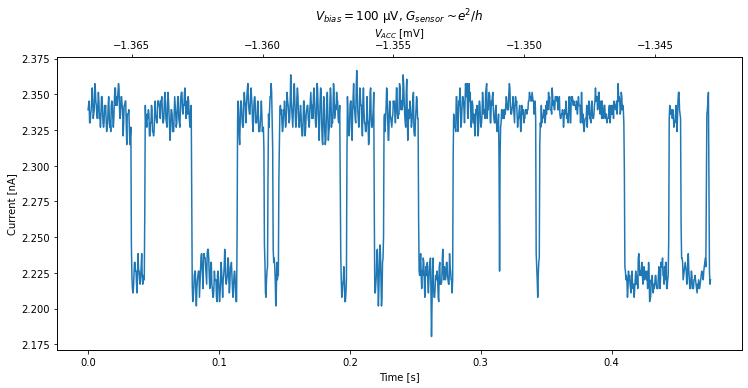

In [66]:
noisedatnum = 4208
dat = get_dat(noisedatnum)
x = dat.Data.get_data('Experiment Copy/x_array')
y = dat.Data.get_data('Experiment Copy/cscurrent')
npnts = len(x)
start = np.int(npnts/2 - npnts/6)
end   = np.int(npnts/2 - npnts/7)
plt.plot(np.array(range(0,len(x[start:end] - x[start])))/dat.Logs.measure_freq, y[start:end])
axes1 = plt.gca()
axes2 = axes1.twiny()
axes2.plot(x[start:end]/100, y[start:end], alpha=0)
axes1.set_xlabel('Time [s]')
axes2.set_xlabel(r'$V_{ACC}$ [mV]')
axes1.set_ylabel('Current [nA]')



fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
plt.title(r'$V_{bias} = 100$ μV, $G_{sensor}$ ~$e^2/h$')
plt.tight_layout()
fig.savefig(f'Exports/presentation_03_29/noise_100microvolt.pdf', format='pdf')

# fig.update_layout(yaxis_title='Current [nA]')
# fig.update_xaxes(title_text="Time [s]", secondary_x=False)
# fig.update_xaxes(title_text="Vacc [mV]", secondary_x=True)

# fig.update_layout(title_text=f'300 μV bias on 0 to 1 of charge sensor')
# fig.show(renderer='chrome')

In [56]:
dat.Logs.measure_freq

2538.1